# Trabajo Fin de Grado - DACYA

## Control de Sistemas Multiagente y sus Aplicaciones

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

from sympy import symbols, Matrix

import picos

%matplotlib widget

### System Setup

In [3]:
## Graph setup
vertices = {1,2,3,4,5,6} # Vertices
edges = [(1,2),(1,3),(1,5),(1,6),(2,4),(2,5),(2,6),(3,4),(3,5),(3,6),(4,5),(4,6)] # Edges


In [4]:
# ## Graph setup 2
# vertices = {1,2,3,4,5} # Vertices
# edges = [(1,2), (1,3), (1,4), (2,3), (2,4), (3,4), (3,5), (4,5), (5,1)] # Edges

In [5]:
## Positions
p1 = np.array([-1,-1])
p2 = np.array([-1,1])
p3 = -p2
p4 = -p1
p5 = np.array([2,0])
p6 = -p5

# p1 = np.array([-1,1])
# p2 = np.array([-1,-1])
# p3 = -p1
# p4 = -p2
# p5 = np.array([2,0])

p = np.array([p1,p2,p3,p4,p5,p6]) 
# p = np.array([p1,p2,p3,p4,p5]) 

pbar = np.column_stack((p,np.ones(len(vertices))))

In [6]:
# import numpy as np

# def generate_star_polygon_with_positions(n, k):
#     # Generate the vertices positions
#     angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
#     positions = np.array([(np.cos(a), np.sin(a)) for a in angles])
    
#     # Generate the vertex indices as a set
#     vertices = set(range(1, n + 1))
    
#     # Generate the edges for the regular n-gon
#     edges = []
#     vertices_list = list(vertices)  # Convert set to list for indexing
#     for i in range(n):
#         edges.append((vertices_list[i], vertices_list[(i + 1) % n]))
    
#     # Generate the edges for the star polygon with step size k
#     for i in range(n):
#         edges.append((vertices_list[i], vertices_list[(i + k) % n]))

#     return vertices, positions, edges


In [7]:
# # Example usage for n = 10 and step size k = 3
# n = 50
# k = 25
# vertices, p, edges = generate_star_polygon_with_positions(n, k)

# pbar = np.column_stack((p,np.ones(len(vertices))))

In [8]:
## Incidence Matrix 
H = np.zeros([len(vertices),len(edges)]) # H is defined as a +-1 matrix, where the rows indicate the vertices and the columns, the edges. The sign is due to convention an indicates that it is a directed graph.
for i in enumerate(edges): # First element from enumerate indicates edge index, the other is the vertices connected by it
    H[i[1][0]-1, i[0]] = 1 # i[1][0]-1 takes the first vertex index connected by the edge, the second element associates an edge to it. +1 due to convention
    H[i[1][1]-1, i[0]] = -1 # i[1][0]-1 takes the second vertex index connected by the edge, the second element associates an edge to it. -1 due to convention
Matrix(H)

Matrix([
[ 1.0,  1.0,  1.0,  1.0,    0,    0,    0,    0,    0,    0,    0,    0],
[-1.0,    0,    0,    0,  1.0,  1.0,  1.0,    0,    0,    0,    0,    0],
[   0, -1.0,    0,    0,    0,    0,    0,  1.0,  1.0,  1.0,    0,    0],
[   0,    0,    0,    0, -1.0,    0,    0, -1.0,    0,    0,  1.0,  1.0],
[   0,    0, -1.0,    0,    0, -1.0,    0,    0, -1.0,    0, -1.0,    0],
[   0,    0,    0, -1.0,    0,    0, -1.0,    0,    0, -1.0,    0, -1.0]])

In [9]:
H.T @ np.ones([len(vertices),1]) # Condition being H^T * 1_n = 0

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Equilibrium Stresses

In [10]:
E =pbar.T @ H @ np.diag(H[0,:]) # Creating the first element from which the matrix will be built.

for i in range(1, len(vertices)): # Using a loop with a range from 1 to add the next elements
    E = np.append(E,pbar.T @ H @ np.diag(H.T[:,i]), axis = 0)

Matrix(E)

Matrix([
[   0, -2.0, -3.0,  1.0,    0,    0,    0,    0,    0,    0,    0,    0],
[-2.0,    0, -1.0, -1.0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0, -2.0, -3.0,  1.0,    0,    0,    0,    0,    0],
[ 2.0,    0,    0,    0,    0,  1.0,  1.0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,  2.0,    0,    0,    0,    0,    0,    0, -1.0,  3.0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0, -2.0, -1.0, -1.0,    0,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,    0,    0,  2.0,    0,    0,    0,    0,    0, -1.0,  3.0],
[   0,    0,    0,    0,    0,    0,    0,  2.0,    0,    0,  1.0,  1.0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0,    0,  3.0,    0,    0,  3.0,    0,    0,  1.0,    0,  1.0,    0],
[   0,    0,  1.0,    0,    0

In [11]:
## SVD (Singular Value Decomposition)
U, S, Vt = np.linalg.svd(E)

rank = np.linalg.matrix_rank(E)
Z = Vt[rank:,:].T # This z should represent a basis of the nullspace of E. To check it: E @ Z = 0
Matrix(E@Z) # The values obtained are either 0 or very close to it. Why is this? Maybe due to svd or machine error --> check later


Matrix([
[-3.33066907387547e-16,  3.60822483003176e-16, -1.94289029309402e-16],
[                    0,  1.38777878078145e-16,  8.32667268468867e-17],
[                    0,                     0,                     0],
[ 1.66533453693773e-16,                     0, -2.22044604925031e-16],
[                    0,  2.22044604925031e-16,                     0],
[                    0,                     0,                     0],
[ 1.11022302462516e-16,  9.71445146547012e-17,  5.55111512312578e-16],
[-3.33066907387547e-16,  4.16333634234434e-17,  1.11022302462516e-16],
[                    0,                     0,                     0],
[ 4.16333634234434e-17,  2.22044604925031e-16,  3.33066907387547e-16],
[ 1.80411241501588e-16, -1.11022302462516e-16,  5.55111512312578e-17],
[                    0,                     0,                     0],
[-6.10622663543836e-16, -3.33066907387547e-16, -2.77555756156289e-16],
[ 2.22044604925031e-16, -1.11022302462516e-16, -2.22044604925031e-16

In [12]:
print("Machine epsilon (float): ",np.finfo(float).eps, ".", sep = "")
# This may explain why Z is not completely 0. The computer cannot tell if values below epsilon are 0 or not.

Machine epsilon (float): 2.220446049250313e-16.


In [13]:
Up, Sp, Vtp = np.linalg.svd(pbar)

d = len(p1) # Dimensions
U1 = Up[:,:1+d] # The first 1+d columns are U1
U2 = Up[:, 1+d:] # The rest of the columns are U2

In [14]:
# In this case Z only has 1 column, but in case there were more, we have to make a loop for each column.
M = [] # We create it as a list so it will be storing each matrix resulting from each i separatedly, that way we will be able to call it after individually.
for i in range(Z.shape[1]): # Loops for each column of Z
    M.append(U2.T @ H @ np.diag(Z[:,i]) @ H.T @ U2)
M

[array([[-0.44897169,  0.68131122, -0.34840124],
        [ 0.68131122,  0.20818207, -0.49886673],
        [-0.34840124, -0.49886673,  1.06225571]]),
 array([[ 0.98027487, -0.37350851,  0.2070102 ],
        [-0.37350851,  1.26986436, -0.21469122],
        [ 0.2070102 , -0.21469122,  0.722386  ]]),
 array([[ 4.52151663e-01, -1.11965821e-01,  5.81232292e-01],
        [-1.11965821e-01, -1.09859250e+00, -5.26560168e-04],
        [ 5.81232292e-01, -5.26560168e-04,  9.45250571e-01]])]

In [15]:
## LMI problem M_i * c_i > 0, solve with PICOS

P = picos.Problem()
c = picos.RealVariable("c", len(M))
M_i = [picos.Constant(Mi) for Mi in M]
Sum = picos.sum(c[i] * M_i[i] for i in range(len(M_i)))
P.add_constraint(Sum>>0)
print(P)
P.solve()

ci = np.array([c.np])

Feasibility Problem
  find an assignment
  for
    3×1 real variable c
  subject to
    ∑(c[i]·[3×3] : i ∈ [0…2]) ≽ 0


In [16]:
try:
    w = sum(ci[i] * Z[:,i] for i in range(len(c)))
except:
    w = [sum(Z[:,i]*ci[0][i] for i in range(Z.shape[1]))]
    w = w[0]

In [17]:
Omega = H @ np.diag(w) @ H.T

In [18]:
Matrix(np.around(Omega, decimals = 3))

Matrix([
[   0.5,  0.125, -0.375,      0,  0.125, -0.375],
[ 0.125,    0.5,      0, -0.375,  0.125, -0.375],
[-0.375,      0,    0.5,  0.125, -0.375,  0.125],
[     0, -0.375,  0.125,    0.5, -0.375,  0.125],
[ 0.125,  0.125, -0.375, -0.375,    0.5,      0],
[-0.375, -0.375,  0.125,  0.125,      0,    0.5]])

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]
 [ 2  0]
 [-2  0]]
0.12499999993556596
-0.37499999980669824
0.12499999993556621
-0.374999999806698
-0.37499999980669824
0.12499999993556611
-0.37499999980669824
0.12499999993556613
-0.3749999998066983
0.12499999993556601
-0.3749999998066982
0.12499999993556603


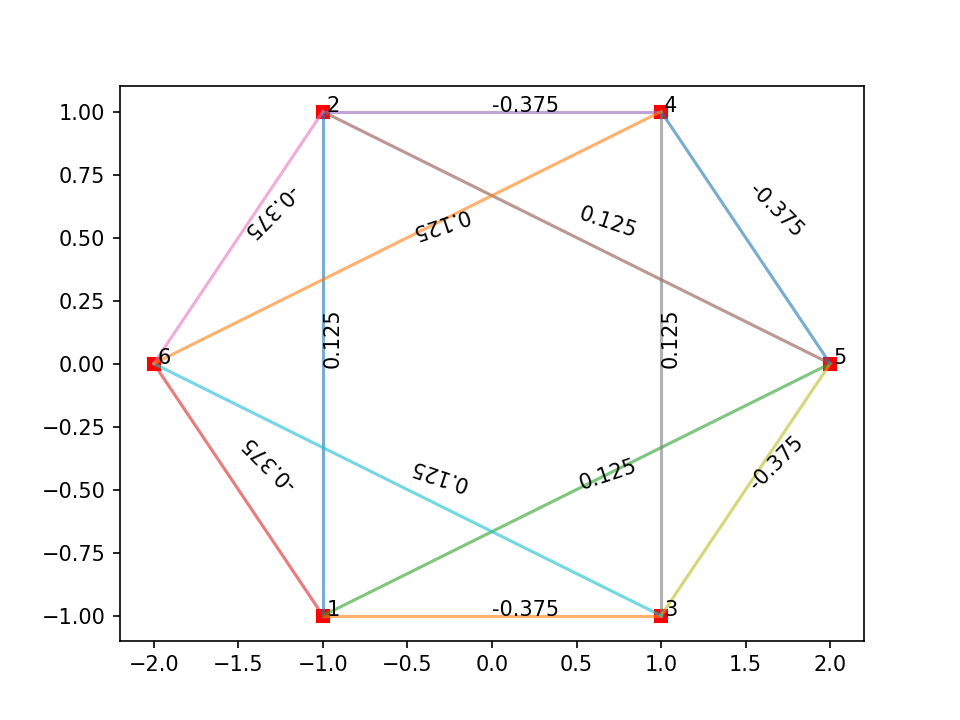

In [19]:
Prs = np.reshape(p,[2*p.shape[0],1]) #posisciones de referencia apiladas
print(p)
plt.figure(dpi = 150)
plt.plot(p[:,0], p[:,1], "sr")
for i in enumerate(p):
    plt.gca().text(x = i[1][0]+0.02, y = i[1][1], s = str(i[0]+1))

for j in enumerate(edges):
    nodex = p[[j[1][0]-1,j[1][1]-1],0]
    nodey = p[[j[1][0]-1,j[1][1]-1],1]
    plt.plot(nodex, nodey, "-", alpha = 0.6)
    plt.gca().text(x = np.mean(nodex), y = np.mean(nodey) , s = str(round(Omega[j[1][0]-1,j[1][1]-1],3)), rotation = 180 + 180*float(np.arctan2(p[j[1][0]-1,1]-p[j[1][1]-1,1], p[j[1][0]-1,0]-p[j[1][1]-1,0])/np.pi))
    print(Omega[j[1][0]-1,j[1][1]-1])
plt.show()


### $\dot{p}$ definition

(6, 6)
(12, 12) 



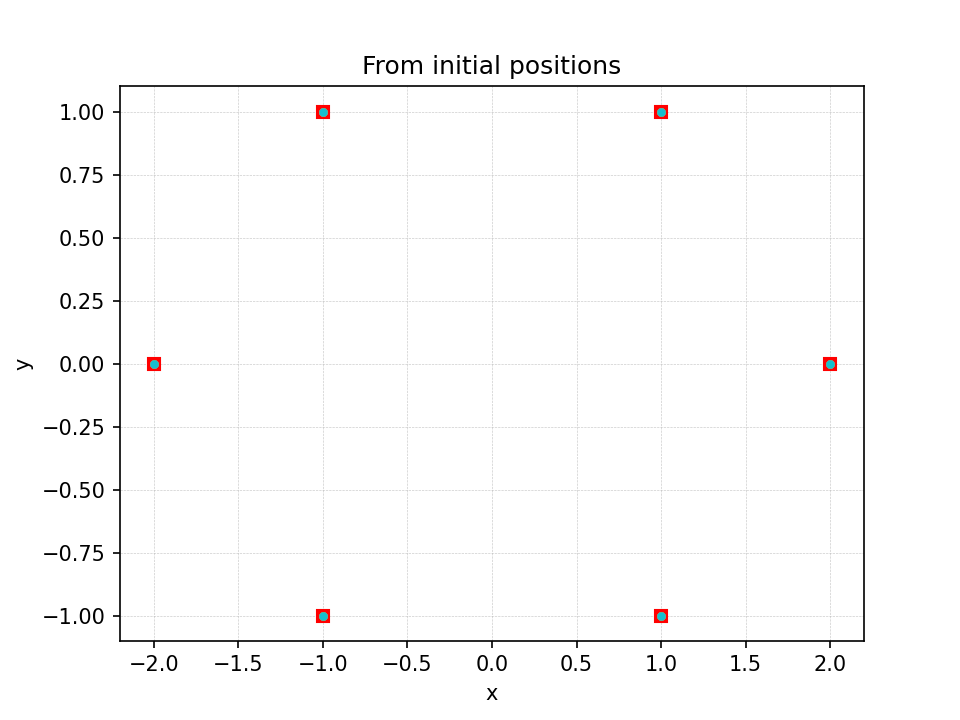

In [20]:
I = np.eye(2)
Lbar = np.kron(Omega, I)
print(Omega.shape)
print(Lbar.shape, "\n")  # should be pmxqm, where p and q = 5 and m = 2 (dim of the system)
h = 5 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T

pdot = -h * Lbar * pstack

Pt = pstack.copy()

t = 0
tf = 1000
dt = 0.01
tp = tf/1000
plt.figure(dpi = 150)

plt.plot(Pt[0::2,0],Pt[1::2,0],'sr',linewidth =0.1)

while t <= tf:
    t += dt
    if t >= tp:
        plt.plot(Pt[0::2,0],Pt[1::2,0],'.',linewidth =0.1)
        tp += tf/1000
    Pt = Pt - h*Lbar@Pt*dt
plt.title("From initial positions")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.show()

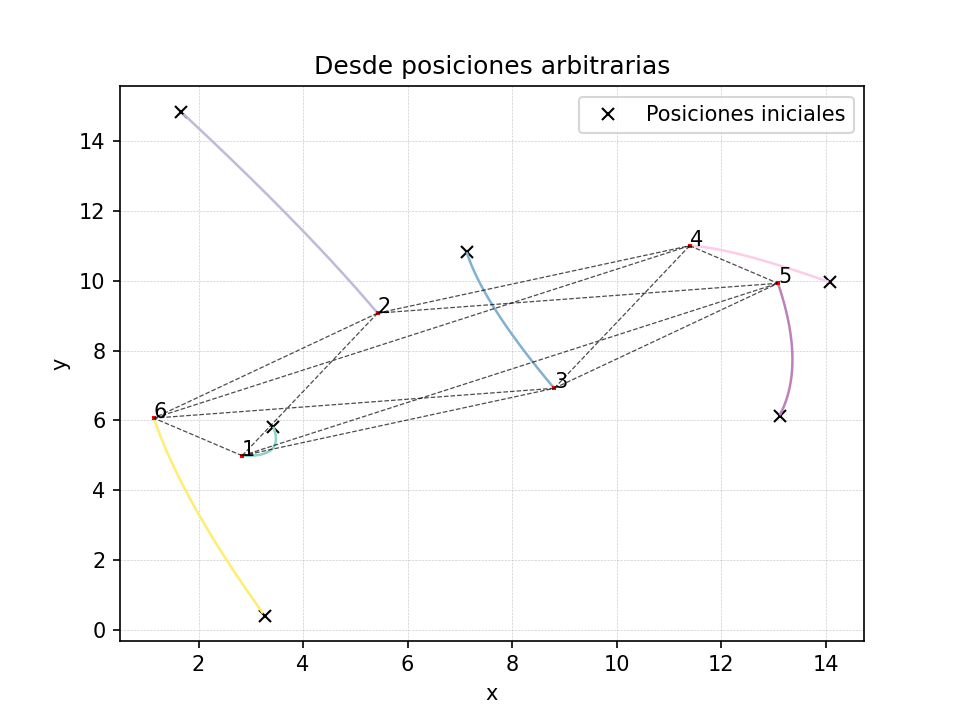

In [21]:
h = 0.1 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

dt = 0.01
tf = 200
tp = tf/1000
t = 0

Pt = 15*np.random.rand(len(pstack),1)

plt.figure(dpi = 150)



plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")
# plt.xlim([min(Pt) - 0.1, max(Pt) + 0.1])
# plt.ylim([min(Pt) - 0.1, max(Pt) + 0.1])

trajx = []
trajy = []
times = []

while t <= tf:
    t += dt
    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', markersize = 0.5)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        times.append(t)
        tp += tf/1000
    #consenso lo ejecuto siempre como referencia
        
    Pt = Pt - h*np.kron(Omega,I)@Pt*dt

cmap = plt.get_cmap('Set3')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 1.2)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6, linestyle = "--", alpha=0.7)


plt.title("Desde posiciones arbitrarias")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

## Motion parameters design

In [22]:
n = len(vertices)

## Traslación
v = np.array([[1,0]]).T
Mtras = np.kron(np.ones((n,1)), v)

## Rotación
angvel = np.pi/180 # 1 º/s
W = np.array([[0,-angvel],[angvel, 0]]) # Matriz de velocidad angular en 2D
Mrbar = np.kron(np.eye(n),W) # Rotación

## Escalado
Msbar = np.eye(n*2)

## Shearing (Cizallamiento)
hxy = 1
hyx = 1
S = np.array([[0,hxy],[hyx,0]])
Mslbar = np.kron(np.eye(n), S)


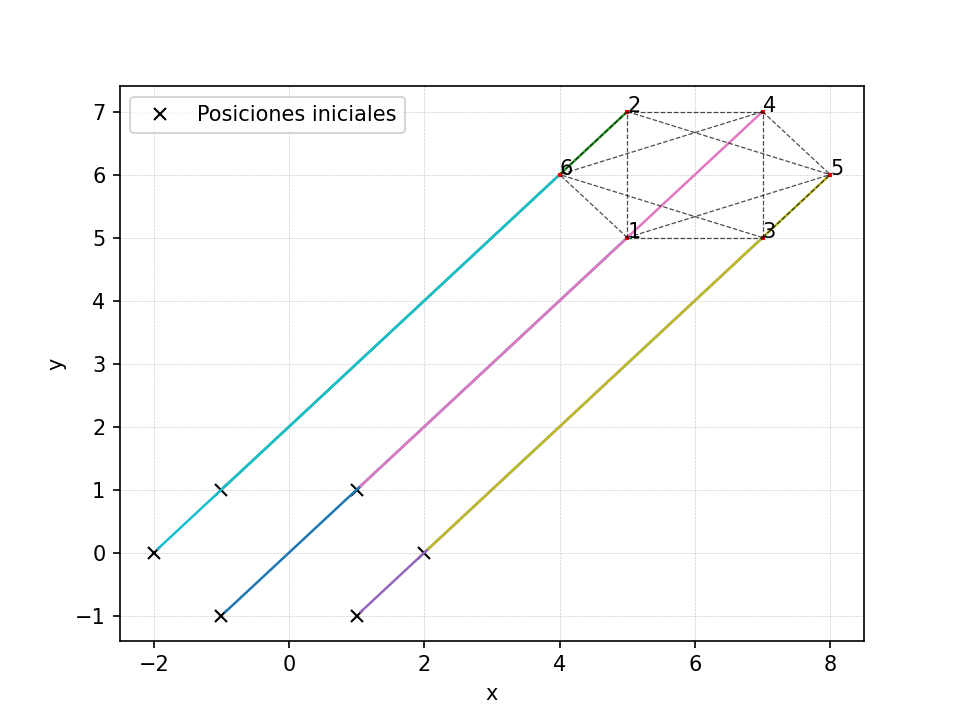

In [23]:
h = 2 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

dt = 0.01
tf = 200
tp = tf/100
t = 0
k= -0.03 # Ganancia del parámetro de movimiento

v = np.array([[1,1]]).T
Mtras = np.kron(np.ones((n,1)), v)

plt.figure(dpi = 150)

plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")

trajx = []
trajy = []

while t <= tf:
    t += dt
    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', color = "gray", markersize = 0.5)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        tp += tf/100
    #consenso lo ejecuto siempre como referencia
        
    Pt = Pt - (h*Lbar@Pt + k*Mtras)*dt

cmap = plt.get_cmap('tab10')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 1.2)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6, linestyle = "--", alpha=0.7)


# plt.title("Traslación diagonal")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
plt.show()
v = np.array([[1,0]]).T
Mtras = np.kron(np.ones((n,1)), v)


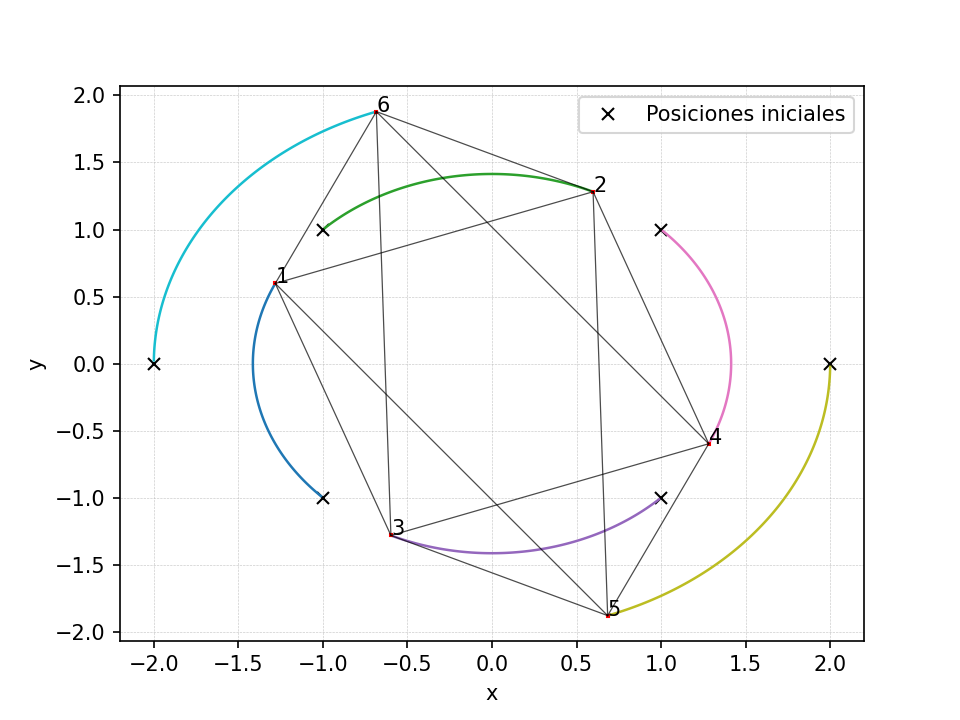

In [24]:
h = 2 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

dt = 0.01
tf = 200
tp = tf/100
t = 0
k= 0.35 # Ganancia del parámetro de movimiento


plt.figure(dpi = 150)

plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")

trajx = []
trajy = []

while t <= tf:
    t += dt
    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', color = "gray", markersize = 0.5)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        tp += tf/100
    #consenso lo ejecuto siempre como referencia
        
    Pt = Pt - (h*Lbar@Pt + k*Mrbar@Pt)*dt


cmap = plt.get_cmap('tab10')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 1.2)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6, linestyle = "-", alpha=0.7)

# plt.title("Rotación positiva")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

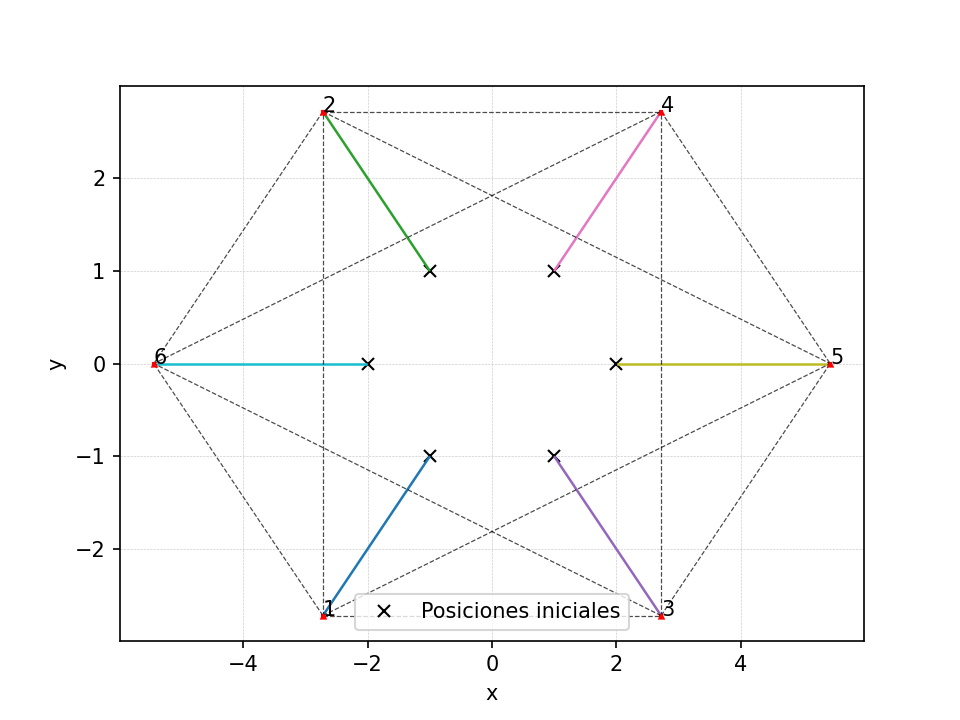

In [25]:
h = 2 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

dt = 0.01
tf = 100
tp = tf/100
t = 0
k= -0.01 # Ganancia del parámetro de movimiento


plt.figure(dpi = 150)

plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")
# plt.xlim([min(Pt) - 0.1, max(Pt) + 0.1])
# plt.ylim([min(Pt) - 0.1, max(Pt) + 0.1])

trajx = []
trajy = []

while t <= tf:
    t += dt
    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', color = "gray", markersize = 0.5)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        tp += tf/100
    #consenso lo ejecuto siempre como referencia
        
    Pt = Pt - (h*Lbar@Pt + k*Msbar@Pt)*dt


cmap = plt.get_cmap('tab10')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 1.2)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6, linestyle = "--", alpha=0.7)

plt.plot(Pt[0::2,0],Pt[1::2,0],'^r', markersize = 2)
# plt.title("Escalado positivo")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

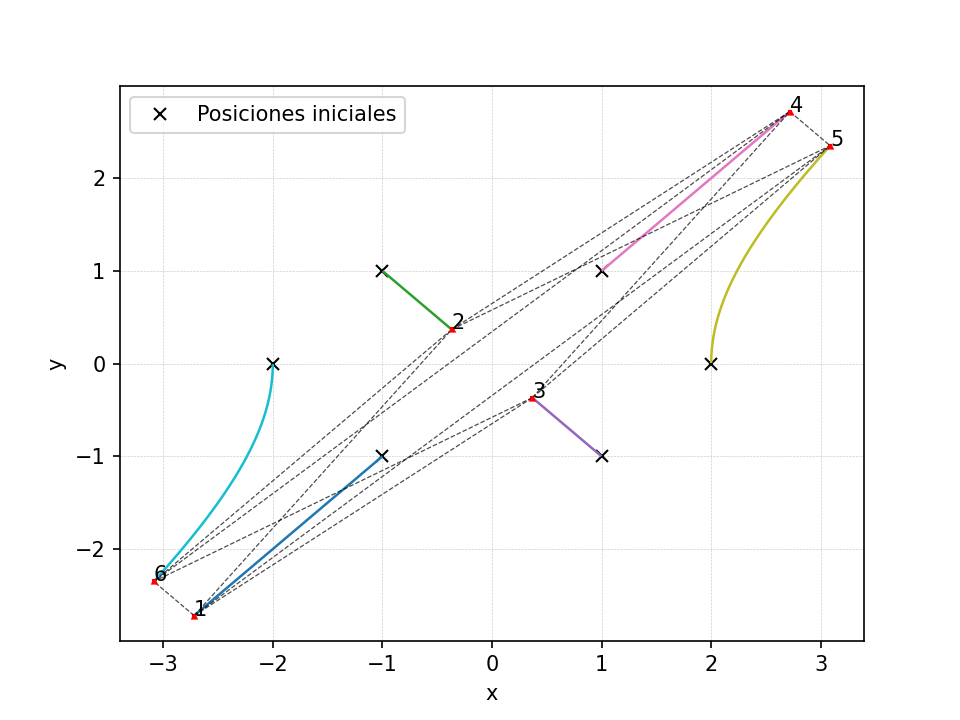

In [26]:
h = 2 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

dt = 0.01
tf = 100
tp = tf/100
t = 0
k= -0.01 # Ganancia del parámetro de movimiento


plt.figure(dpi = 150)

plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")
# plt.xlim([min(Pt) - 0.1, max(Pt) + 0.1])
# plt.ylim([min(Pt) - 0.1, max(Pt) + 0.1])

trajx = []
trajy = []

while t <= tf:
    t += dt
    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', color = "gray", markersize = 0.5)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        tp += tf/100
    #consenso lo ejecuto siempre como referencia
        
    Pt = Pt - (h*Lbar@Pt + k*Mslbar@Pt)*dt

cmap = plt.get_cmap('tab10')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 1.2)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6, linestyle = "--", alpha=0.7)

plt.plot(Pt[0::2,0],Pt[1::2,0],'^r', markersize = 2)

# plt.title("Cizallamiento (ambos ejes)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

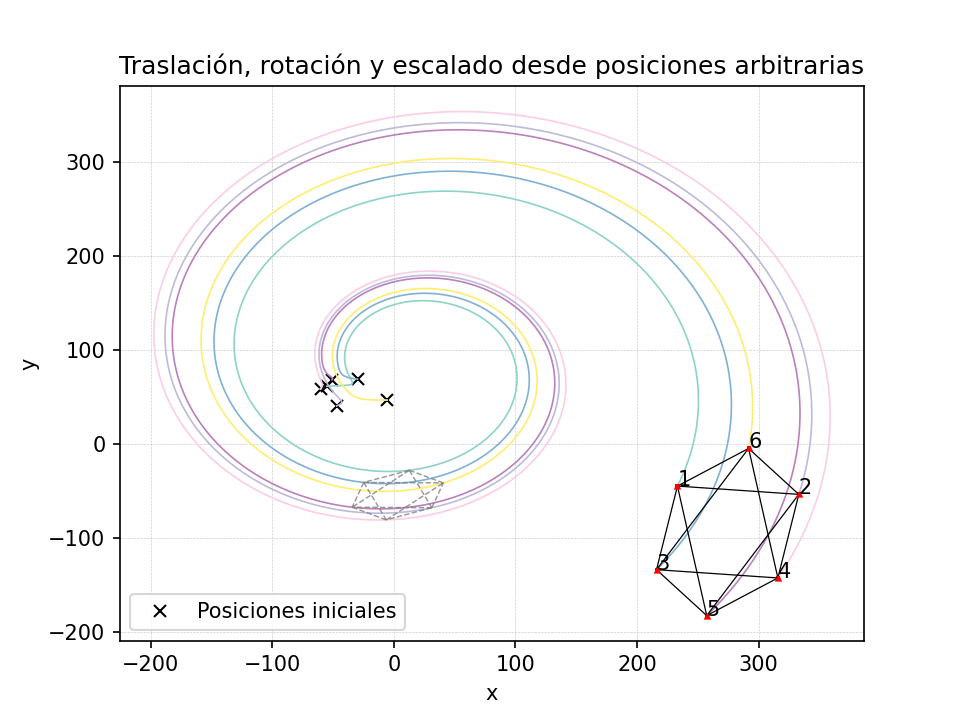

In [27]:
h = 1 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

Pt = 30*Mrbar@(150*np.random.rand(len(pstack),1))

dt = 0.006
tf = 300
tp = 0
tp2 = tf/2
t = 0.1
kt = 3 # Ganancia de traslación
ks = -.0055 # Ganancia del scaling
kr = 2 # Ganancia de la rotación


plt.figure(dpi = 150)

plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")
# plt.xlim([min(Pt) - 0.1, max(Pt) + 0.1])
# plt.ylim([min(Pt) - 0.1, max(Pt) + 0.1])

trajx = [] # Para futuro, almacenar trayectorias para dibujarlas en líneas
trajy = []
times = []



while t <= tf:
    t += dt

    if t >= tp2:
        Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
        for i in enumerate(edges):
            plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], '--', color = "gray", alpha = 0.8, zorder = 10, linewidth = 0.7)
        tp2 = tf+1

    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', color = "gray", markersize = 0.1)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        times.append(t)
        tp += tf/2000
        
    Pt = Pt - (h*Lbar@Pt + (ks*Msbar+ kr*Mrbar)@Pt + kt*Mtras)*dt


cmap = plt.get_cmap('Set3')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 0.8)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6)

plt.plot(Pt[0::2,0],Pt[1::2,0],'^r', markersize = 2)

plt.title("Traslación, rotación y escalado desde posiciones arbitrarias")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
# plt.axis('equal')

plt.show()

In [28]:
len(edges)

12

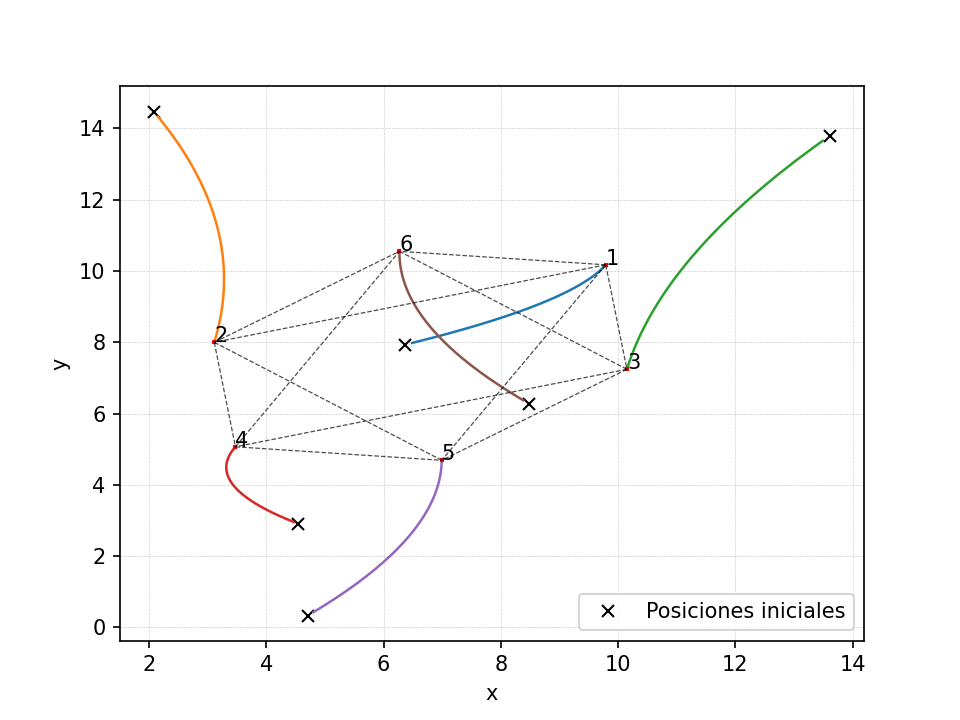

In [29]:
h = 1 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

dt = 0.01
tf = 200
tp = tf/5000
t = 0

Pt = 15*np.random.rand(len(pstack),1)

plt.figure(dpi = 150)



plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")
# plt.xlim([min(Pt) - 0.1, max(Pt) + 0.1])
# plt.ylim([min(Pt) - 0.1, max(Pt) + 0.1])

trajx = []
trajy = []
times = []

while t <= tf:
    t += dt
    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', markersize = 0.5)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        times.append(t)
        tp += tf/5000
    #consenso lo ejecuto siempre como referencia
        
    Pt = Pt - h*np.kron(Omega,I)@Pt*dt

# cmap = plt.get_cmap('Set3')
# norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
# colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
# plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 1.2)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6, linestyle = "--", alpha=0.7)


# plt.title("Desde posiciones arbitrarias")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
plt.show()

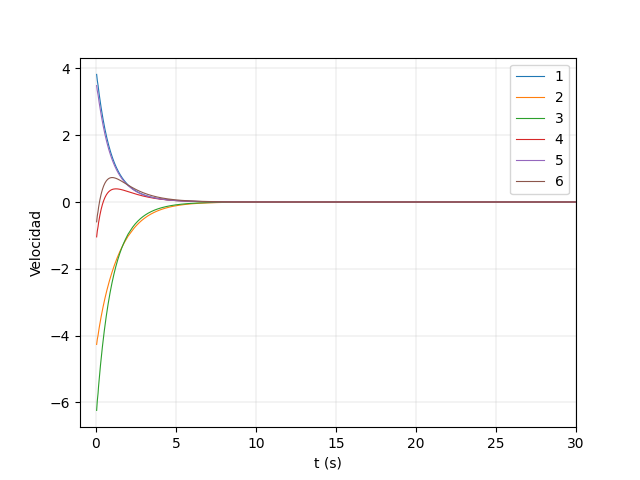

In [30]:
x = np.array(trajx)
y = np.array(trajy)

r = [0]*x.shape[1]
for i in range(len(r)):
    vect = np.array([x[:,i],y[:,i]])
    norms = np.array([])
    for j in range(vect.shape[1]):
        norms = np.append(norms,np.linalg.norm(vect[:,j]))
    r[i] = norms
r = np.array(r)

tq = np.array(times)
vel = [0]*x.shape[1]

plt.figure()
# cmap = plt.get_cmap('tab10')
# norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
# colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
# plt.gca().set_prop_cycle(color=colors)
for i in range(x.shape[1]):
    vel[i] = np.diff(r[i,:])/np.diff(tq)
    plt.plot(tq[:-1] ,vel[i], label = i+1, linewidth = 0.8)

# plt.title("Velocidades de los agentes")
plt.xlabel("t (s)")
plt.ylabel("Velocidad")
plt.grid(linewidth=0.2)
plt.xlim(left = -1, right = 30)
plt.legend()
plt.show()

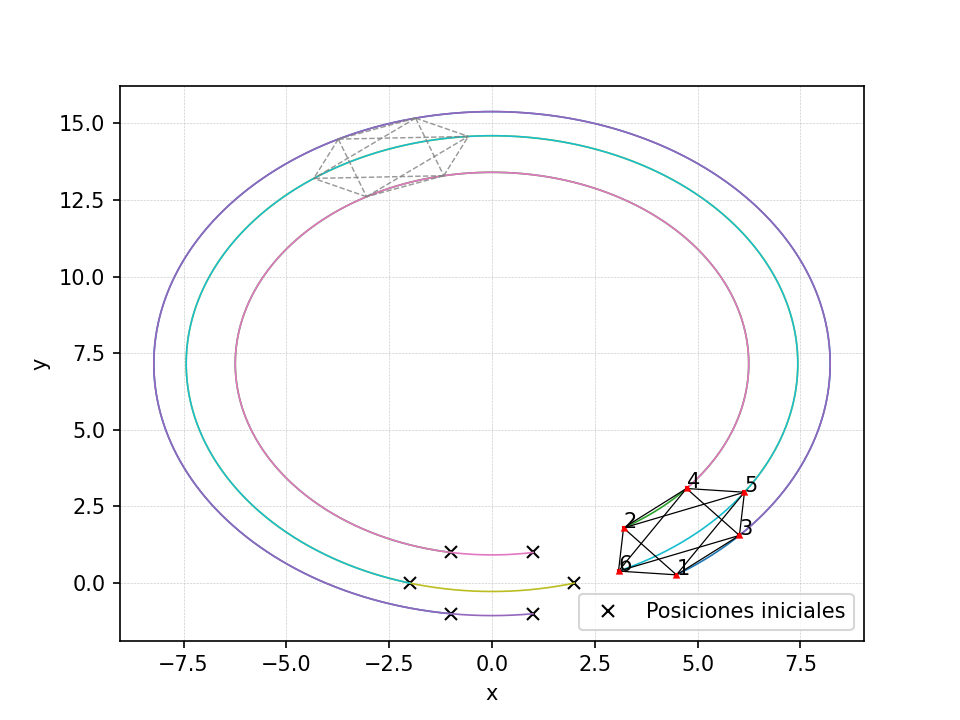

In [31]:
h = 1 # Arbitrary constant gain
pstack = np.array([p.flatten()]).T
Pt = pstack.copy()

dt = 0.006
tf = 800
tp = 0
tp2 = tf/2
t = 0.1
kt = 0.05 # Ganancia de traslación
ks = 0 # Ganancia del scaling
kr = 0.4 # Ganancia de la rotación


plt.figure(dpi = 150)

plt.plot(Pt[0::2,0],Pt[1::2,0],'xk',linewidth =0.1, label = "Posiciones iniciales")
# plt.xlim([min(Pt) - 0.1, max(Pt) + 0.1])
# plt.ylim([min(Pt) - 0.1, max(Pt) + 0.1])

trajx = [] # Para futuro, almacenar trayectorias para dibujarlas en líneas
trajy = []
times = []



while t <= tf:
    t += dt

    if t >= tp2:
        Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
        for i in enumerate(edges):
            plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], '--', color = "gray", alpha = 0.8, zorder = 10, linewidth = 0.7)
        tp2 = tf+1

    if t >= tp:
        # plt.plot(Pt[0::2,0],Pt[1::2,0],'.', color = "gray", markersize = 0.1)
        trajx.append(Pt[0::2,0])
        trajy.append(Pt[1::2,0])
        times.append(t)
        tp += tf/2000
        
    Pt = Pt - (h*Lbar@Pt + (ks*Msbar+ kr*Mrbar)@Pt + kt*Mtras)*dt


cmap = plt.get_cmap('tab10')
norm = plt.Normalize(vmin=0, vmax=np.array(trajx).shape[1] - 1)
colors = cmap(norm(np.arange(np.array(trajx).shape[1])))
plt.gca().set_prop_cycle(color=colors)
plt.plot(np.array(trajx),np.array(trajy), linewidth = 0.8)
plt.plot(Pt[0::2,0],Pt[1::2,0],'sr', markersize = 1)

Pst = np.array([Pt[0::2,0],Pt[1::2,0]]).T
for i in enumerate(Pst):
    plt.gca().text(i[1][0],i[1][1],str(i[0]+1))
for i in enumerate(edges):
    plt.plot(Pst[[i[1][0]-1,i[1][1]-1],0],Pst[[i[1][0]-1,i[1][1]-1],1], color = "black", linewidth = 0.6)

plt.plot(Pt[0::2,0],Pt[1::2,0],'^r', markersize = 2)

# plt.title("Rotación con traslación")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha = 0.7 ,linestyle='--', linewidth=0.3)
plt.legend()
# plt.axis('equal')

plt.show()